# You may use this as a template for your activity.

## FIXME: System Linearization and State Space Form

In [1]:
# FIXME: Find an equilibrium point and linearize the system into state space form

## FIXME: Gain Selection and Controller Design

In [2]:
# FIXME: Select a set of control and observer gains. Ensure the resultant system is stable. Implement your controller below.

In [3]:
# Create the Controller class
class Controller():
    def __init__(self):
        """
        Initializes the controller. You should initialize any member variables that
        the controller will use to their starting values. This function is called
        when a new instance of the Controller class is created.
    
        Parameters
        ----------
        None.
    
        Returns
        -------
        None.
        """
        # FIXME: Replace the following code with your initialization function
        pass
        
    
    def reset(self):
        """
        Resets the controller to an initial state. You should reset any member variable
        that tracks states, times, etc. in this function. This function will be 
        called just before the simulation starts running and any time the simulation
        is reset.
    
        Parameters
        ----------
        None.
    
        Returns
        -------
        None.
        """
        # FIXME: Replace the following code with your reset function
        pass

    
    def run(self, **kwargs):
        """
        Runs the controller. Data is passed from the simulation environment to the
        controller via kwargs, the controller calculates the inputs to the system,
        and then returns them via a return statement
    
        Parameters
        ----------
        **kwargs : Dictionary
            A dictionary of data passed from the simulation environment to the 
            controller. Specific data is extracted from kwargs via the statement:
            kwargs["KEYWORD"], where "KEYWORD" is a key to the dictionary. The keys
            of kwargs for this project are as follows:

            kwargs["pendulum_angle"] : Float
                The current angle of the pendulum in radians (theta)  -- theta

            kwargs["wheel_angle"] : Float
                The current target angle of the wheels in radians (phi) -- phi

            kwargs["pendulum_velocity"] : Float
                The current angular velocity of the pendulum in radians/second -- thetadot

            kwargs["wheel_velocity"] : Float
                The current target angular velocity of the wheels in radians/second -- phidot

            kwargs["time"] : Float
                The current simulation time in seconds
            
    
        Returns
        -------
        inputs : List with length equal to the number of inputs
            This is a list of the inputs calculated by the controller. In this
            project, there is only one input, the torque to be applied to the 
            wheels. Even though there is only one input in this project,
            it still must be placed in a list of length one.
        
        """
        # FIXME: Replace the following manual controller with your own controller

        # Set torque to 0
        torque = 0.0

        # Adjust torque based on keyboard inputs
        if kwargs["sa"]:
            torque -= 0.75
        elif kwargs["a"]:
            torque -= 0.25
        if kwargs["sd"]:
            torque += 0.75
        elif kwargs["d"]:
            torque += 0.25

        # Assemble and return the torques
        inputs = [torque]
        return inputs

In [4]:
# Create an instance of our Controller class
controller = Controller()

## Running the simulation

Before we run the simulation, we must first import the simulation module and then create an instance of the simulator. This is done below:

In [5]:
# Import the cart project. This module is used to simulate, render, and plot a wheel dynamic system
import ae353_cart

There are three main parameters to the ae353_cart class initialization function:
#### Parameters

> **use_keyboard** : *bool, optional*  
> A boolean flag that indicates whether the simulation will allow the use of keyboard interactivity. The default is True.
> 
> **visualization** : *bool, optional*  
> A boolean flag that indicates whether the simulation will be  visualized in meshcat. The default is True.
> 
> **animation** : *bool, optional*  
> A boolean flag that indicates whether animated plots are created in real time. The default is True.

In [6]:
# Create an instance of the cart simulator
sim = ae353_cart.Cart_sim(use_keyboard=True,
                          animation=False,
                          visualization=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


Now we are ready to run the simulation and collect data. To do this we call the ``sim.run()`` function. This function takes an instance of the ``Controller`` class as an argument and returns ``data``. The parameters and return values of ``sim.run()`` are shown below.

#### Parameters

> **controller** : *member of Controller class*  
> Your controller that will generated inputs to the system.
> 
> **max_time** : *Float or None, optional*  
> The total amount of time the simulation is allowed to run. If set to None, the simulation will run until "ESC" is pressed on the keyboard. If the keyboard is disabled (Mac users), and max_time is set to None, the simulation will automatically terminate after 10 seconds of simulated time. The default value is None.
> 
> **initial_pendulum_angle** : *Float, optional*  
> The initial angle of the pendulum in radians. This is set when the simulation starts and when the simulation is reset. The default value is 0.0.
> 
> **initial_wheel_angle** : *Float, optional*  
> The initial angle of the wheels in radians. This is set when the simulation starts and when the simulation is reset. The default value is 0.0.
> 
> **initial_pendulum_velocity** : *Float, optional*  
> The initial velocity of the pendulum in radians/second. This is set when the simulation starts and when the simulation is reset. The default value is 0.0.
> 
> **initial_wheel_velocity** : *Float, optional*  
> The initial velocity of the wheels in radians/second. This is set when the simulation starts and when the simulation is reset. The default value is 0.0.


#### Returns

> **data** : *Dictionary of Lists*  
> A dictionary containing all relevant data generated during the simulation. Specific data is extracted via the statement: data["KEYWORD"], where "KEYWORD" is a key to the dictionary. The keys of data for this project are as follows:
> 
> **data["pendulum_angle"]** : *List of Floats*  
> A list of the pendulum angle in radians at each time stamp during the simulation.
> 
> **data["wheel_angle"]** : *List of Floats*  
> A list of the wheel angle in radians at each time stamp during the simulation.
> 
> **data["pendulum_velocity"]** : *List of Floats*  
> A list of the pendulum velocity in radians/secondat each time stamp during the simulation.
> 
> **data["wheel_velocity"]** : *List of Floats*  
> A list of the wheel velocity in radians/second at each time stamp during the simulation.
> 
> **data["torque"]** : *List of Floats*  
> A list of the applied torque in Newton-meters at each time stamp during the simulation.
> 
> **data["time"]** : *List of Floats*  
> A list of the time stamps in seconds.

If enabled you can use the keyboard to interact with the simulation:  
* press **ENTER** to start the simulation
* press **BACKSPACE** to reset the simulation
* press **SPACE** to pause the simulation
* press **ESC** to end the simulation

If the manual controller is being used:
* press **a** to apply small negative torque to the wheels
* press **SHIFT+a** to apply large negative torque to the wheels
* press **d** to apply small positive torque to the wheels
* press **SHIFT+d** to apply large positive torque to the wheels 

In [7]:
# Run the simulation and collect the simulation data
data = sim.run(controller,
               max_time = None,
               initial_pendulum_angle = 0.0,
               initial_wheel_angle = 0.0,
               initial_pendulum_velocity = 0.0,
               initial_wheel_velocity = 0.0)

PRESS ENTER TO START SIMULATION.
PRESS ESC TO QUIT.
PRESS SPACE TO PAUSE/RESUME SIMULATION.
PRESS BACKSPACE TO RESET SIMULATION.
CONTINUING...
RESET
QUITTING...


## FIXME: Post-processing the simulation data

After the simulation is run, we can plot the data using the Matplotlib package. To start, we import matplotlib and numpy.

In [8]:
# Import the pyplot module from the matplotlib package 
import matplotlib.pyplot as plt

# Import numpy
import numpy as np

Now we can make whichever plots we see fit to make sense of the simulation data. Here we plot the wheel angle versus time as well as the applied torque versus time.

**THIS IS LEFT INTENTIONALLY AS INSUFFICIENT TO PROVE YOUR CONTROLLER CAN CONTROL THE CART.**

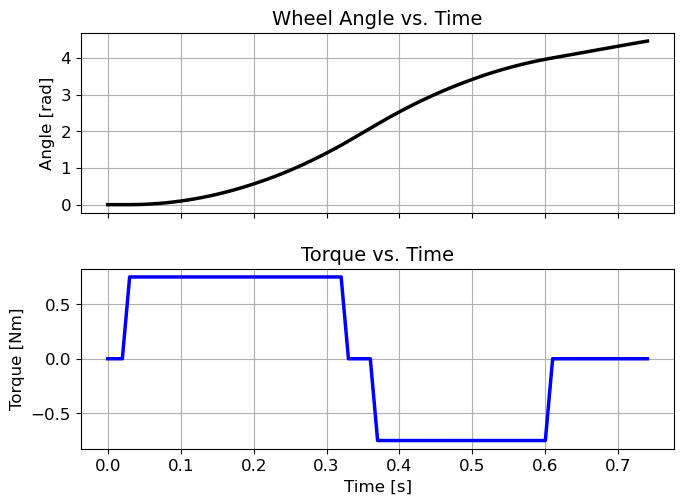

In [9]:
# Create a figure that has two plots in it
fig, axes = plt.subplots(2, 1, figsize=(7.2, 5.4), sharex=True)

# Create a plot of the wheel versus time on the first plot
axes[0].plot(data['time'], data['wheel_angle'], c='k', lw=2.5)
axes[0].set_ylabel("Angle [rad]", fontsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_title("Wheel Angle vs. Time", fontsize=14)
axes[0].grid()

# Create a plot of the torque versus time on the second plot
axes[1].plot(data['time'], data['torque'], label="Torque", c='b', lw=2.5)
axes[1].set_xlabel("Time [s]", fontsize=12)
axes[1].set_ylabel("Torque [Nm]", fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_title("Torque vs. Time", fontsize=14)
axes[1].grid()

# Show the figure
fig.tight_layout(pad=2.0)
plt.show()